In [1]:
#!unzip Dataset_Emotion_Recognition.zip

Importing required libraries

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

Plotting the sample images for all the classes

436 disgust images
3992 angry images
4938 sad images
7164 happy images
3205 surprise images
4982 neutral images
4103 fear images


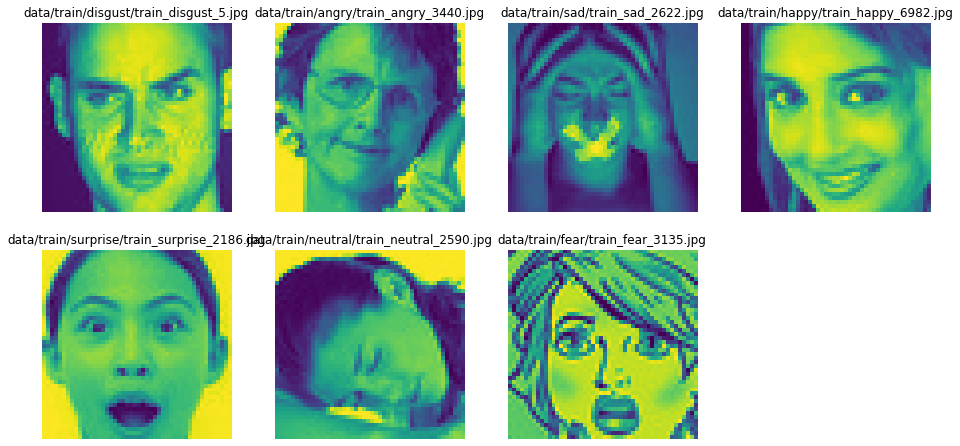

In [6]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4

pic_index = 0
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=4

for expression in os.listdir("data/train/"):
    print(str(len(os.listdir("data/train/" + expression))) + " " + expression + " images")

next_pix = [os.path.join("data/train/" + expression+'/'+ os.listdir("data/train/" + expression)[0]) for expression in os.listdir("data/train/")]

for i, img_path in enumerate(next_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(img_path)

plt.show()

Building a data augmentation for train data to create new data with translation, rescale and flip, and rotation transformations. Rescaling the image at 48x48



In [7]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
                              rescale=1.0/255.,
                              rotation_range=90,
                              horizontal_flip=True,
                              vertical_flip=True
                              )
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)


In [8]:
trainImageData=train_generator.flow_from_directory("data/train/",
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   color_mode = "grayscale",
                                                   shuffle = False,
                                                   target_size=(48,48)
                                                   )
testImageData=test_generator.flow_from_directory("data/test/",
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 color_mode = "grayscale",
                                                 shuffle = False,
                                                 target_size=(48,48),
                                                 )


Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


Building a model using CNN

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=trainImageData.image_shape,activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(16 , (3,3), activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 

# Flatten

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units= 4096 , activation="relu"))
model.add(tf.keras.layers.Dense(units= 1024, activation="relu"))
model.add(tf.keras.layers.Dense(units= 256, activation="relu"))
model.add(tf.keras.layers.Dense(units= 7 , activation="softmax"))

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 16)        4624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 4096)              37752832  
                                                                 
 dense_1 (Dense)             (None, 1024)              4195328   
                                                        

In [ ]:
history=model.fit(trainImageData,
          validation_data=testImageData,
          epochs=10,
          steps_per_epoch = len(trainImageData.filenames) // trainImageData.batch_size,
          validation_steps= len(testImageData.filenames) // testImageData.batch_size)

Epoch 1/10
900/900 [==============================] - 646s 717ms/step - loss: 1.8575 - accuracy: 0.2186 - val_loss: 1.8337 - val_accuracy: 0.2621
Epoch 2/10
900/900 [==============================] - 625s 694ms/step - loss: 1.8309 - accuracy: 0.2419 - val_loss: 1.8163 - val_accuracy: 0.2604
Epoch 3/10
900/900 [==============================] - 623s 692ms/step - loss: 1.8201 - accuracy: 0.2514 - val_loss: 1.7912 - val_accuracy: 0.2605
Epoch 4/10
900/900 [==============================] - 626s 696ms/step - loss: 1.8082 - accuracy: 0.2506 - val_loss: 1.7925 - val_accuracy: 0.2616
Epoch 5/10
900/900 [==============================] - 623s 692ms/step - loss: 1.8027 - accuracy: 0.2539 - val_loss: 1.7897 - val_accuracy: 0.2531
Epoch 6/10
900/900 [==============================] - 623s 693ms/step - loss: 1.7918 - accuracy: 0.2558 - val_loss: 1.7632 - val_accuracy: 0.2716
Epoch 7/10
900/900 [==============================] - 634s 704ms/step - loss: 1.7863 - accuracy: 0.2558 - val_loss: 1.7699 -

Ploting loss and accuracy

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-package

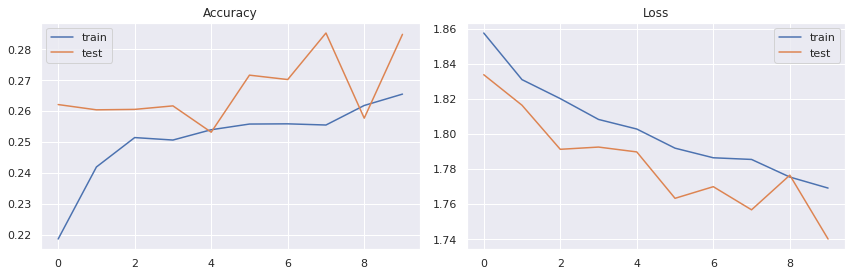

In [ ]:
sns.set()
fig = plt.figure(0, (12, 4))

ax = plt.subplot(1, 2, 1)
sns.lineplot(history.epoch, history.history['accuracy'], label='train')
sns.lineplot(history.epoch, history.history['val_accuracy'], label='test')
plt.title('Accuracy')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(history.epoch, history.history['val_loss'], label='test')
plt.title('Loss')
plt.tight_layout()

#plt.savefig('epoch_history_dcnn.png')
plt.show()

Checking the scores

In [ ]:
from sklearn.metrics import classification_report
predIdxs = model.predict(trainImageData)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(trainImageData.labels, predIdxs,
                            target_names=["angry", "disgust","fear","happy","neutral","sad","surprise"]))

              precision    recall  f1-score   support

       angry       0.29      0.04      0.07      3992
     disgust       0.00      0.00      0.00       436
        fear       0.32      0.00      0.00      4103
       happy       0.29      0.70      0.41      7164
     neutral       1.00      0.00      0.00      4982
         sad       0.24      0.50      0.32      4938
    surprise       0.38      0.10      0.16      3205

    accuracy                           0.28     28820
   macro avg       0.36      0.19      0.14     28820
weighted avg       0.42      0.28      0.19     28820



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CNN using color_mode=rgb'

In [ ]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

In [ ]:
train_generatorcol=tf.keras.preprocessing.image.ImageDataGenerator(
                              rescale=1.0/255.,
                              rotation_range=90,
                              horizontal_flip=True,
                              vertical_flip=True,
                              preprocessing_function=to_grayscale_then_rgb                              
                              )
test_generatorcol=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)

In [ ]:
trainImageDatacol=train_generatorcol.flow_from_directory("data/train/",
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   color_mode = "rgb",
                                                   target_size=(48,48),
                                                   shuffle = False,
                                                   )
testImageDatacol=test_generatorcol.flow_from_directory("data/test/",
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 color_mode = "rgb",
                                                 target_size=(48,48),
                                                 shuffle = False,
                                                 )

Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=trainImageDatacol.image_shape,activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(16 , (3,3), activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 

# Flatten
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units= 4096 , activation="relu"))
model.add(tf.keras.layers.Dense(units= 1024, activation="relu"))
model.add(tf.keras.layers.Dense(units= 256, activation="relu"))
model.add(tf.keras.layers.Dense(units= 7 , activation="softmax"))

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(trainImageDatacol,
          validation_data=testImageDatacol,
          epochs=10,
          steps_per_epoch = len(trainImageDatacol.filenames) // trainImageDatacol.batch_size,
          validation_steps= len(testImageDatacol.filenames) // testImageDatacol.batch_size)

Epoch 1/10
900/900 [==============================] - 670s 743ms/step - loss: 1.8602 - accuracy: 0.2398 - val_loss: 1.8310 - val_accuracy: 0.2595
Epoch 2/10
900/900 [==============================] - 663s 737ms/step - loss: 1.8126 - accuracy: 0.2498 - val_loss: 1.7884 - val_accuracy: 0.2639
Epoch 4/10
900/900 [==============================] - 660s 733ms/step - loss: 1.8000 - accuracy: 0.2600 - val_loss: 1.7868 - val_accuracy: 0.2635
Epoch 5/10
900/900 [==============================] - 658s 731ms/step - loss: 1.7944 - accuracy: 0.2525 - val_loss: 1.8067 - val_accuracy: 0.2763
Epoch 6/10
900/900 [==============================] - 663s 736ms/step - loss: 1.7928 - accuracy: 0.2572 - val_loss: 1.7568 - val_accuracy: 0.2739
Epoch 7/10
900/900 [==============================] - 665s 739ms/step - loss: 1.7754 - accuracy: 0.2634 - val_loss: 1.7541 - val_accuracy: 0.2777
Epoch 8/10
900/900 [==============================] - 663s 737ms/step - loss: 1.7718 - accuracy: 0.2654 - val_loss: 1.8026 -

Checking scores

In [ ]:
from sklearn.metrics import classification_report
predIdxs = model.predict(trainImageDatacol)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(trainImageDatacol.labels, predIdxs,
                            target_names=["angry", "disgust","fear","happy","neutral","sad","surprise"]))

              precision    recall  f1-score   support

       angry       0.40      0.01      0.03      3992
     disgust       0.00      0.00      0.00       436
        fear       0.27      0.04      0.07      4103
       happy       0.29      0.82      0.43      7164
     neutral       0.33      0.03      0.05      4982
         sad       0.26      0.38      0.31      4938
    surprise       0.69      0.09      0.16      3205

    accuracy                           0.29     28820
   macro avg       0.32      0.20      0.15     28820
weighted avg       0.35      0.29      0.20     28820



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CNN model using droupout,batchnormalization

In [ ]:
model = Sequential()


model.add(Conv2D(64,(3,3),padding = 'same',input_shape = trainImageData.image_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))


model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))


model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/usr/local/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=2,
                          verbose=1,
                          #restore_best_weights=True
                          )

callbacks_list = [early_stopping]#,checkpoint]

epochs = 10

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.00098),
              metrics=['accuracy'])

In [ ]:
history = model.fit(trainImageData,
                                steps_per_epoch=trainImageData.n//trainImageData.batch_size,
                                epochs=epochs,
                                validation_data = testImageData,
                                validation_steps = testImageData.n//testImageData.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/10
900/900 [==============================] - 1002s 1s/step - loss: 2.0455 - accuracy: 0.1891 - val_loss: 1.8971 - val_accuracy: 0.2581
Epoch 2/10
900/900 [==============================] - 1006s 1s/step - loss: 1.9414 - accuracy: 0.2043 - val_loss: 1.9349 - val_accuracy: 0.2528
Epoch 3/10
900/900 [==============================] - 1002s 1s/step - loss: 1.9159 - accuracy: 0.2153 - val_loss: 1.8819 - val_accuracy: 0.1392
Epoch 4/10
900/900 [==============================] - 1000s 1s/step - loss: 1.9043 - accuracy: 0.1956 - val_loss: 1.8416 - val_accuracy: 0.2592
Epoch 5/10
900/900 [==============================] - 1025s 1s/step - loss: 1.8895 - accuracy: 0.2134 - val_loss: 1.8416 - val_accuracy: 0.2592
Epoch 6/10
900/900 [==============================] - 1051s 1s/step - loss: 1.8783 - accuracy: 0.2199 - val_loss: 1.8753 - val_accuracy: 0.1446
Epoch 6: early stopping


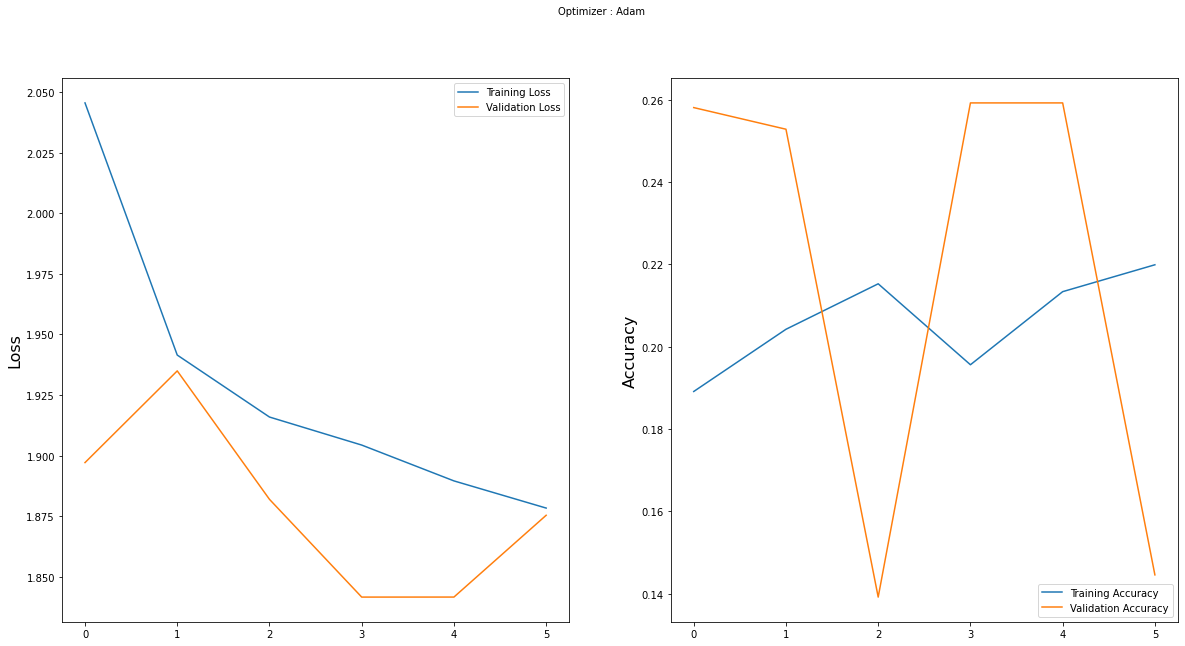

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
predIdxs = model.predict(trainImageData)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(trainImageData.labels, predIdxs,
                            target_names=["angry", "disgust","fear","happy","neutral","sad","surprise"]))

              precision    recall  f1-score   support

       angry       0.16      0.00      0.00      3992
     disgust       0.00      0.00      0.00       436
        fear       0.14      1.00      0.25      4103
       happy       0.00      0.00      0.00      7164
     neutral       0.00      0.00      0.00      4982
         sad       0.00      0.00      0.00      4938
    surprise       0.00      0.00      0.00      3205

    accuracy                           0.14     28820
   macro avg       0.04      0.14      0.04     28820
weighted avg       0.04      0.14      0.04     28820



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model with droupots,batchnormalization for color mode

In [ ]:
model = Sequential()


model.add(Conv2D(64,(3,3),padding = 'same',input_shape=trainImageDatacol.image_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))


model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))


model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

/usr/local/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(trainImageDatacol,
                                steps_per_epoch=trainImageDatacol.n//trainImageDatacol.batch_size,
                                epochs=epochs,
                                validation_data = testImageDatacol,
                                validation_steps = testImageDatacol.n//testImageDatacol.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/10
900/900 [==============================] - 1077s 1s/step - loss: 2.0710 - accuracy: 0.1899 - val_loss: 1.8236 - val_accuracy: 0.2283
Epoch 2/10
900/900 [==============================] - 1099s 1s/step - loss: 1.9837 - accuracy: 0.1946 - val_loss: 1.8237 - val_accuracy: 0.2474
Epoch 3/10
900/900 [==============================] - 1112s 1s/step - loss: 1.9501 - accuracy: 0.1972 - val_loss: 1.8264 - val_accuracy: 0.2016
Epoch 3: early stopping


In [ ]:
from sklearn.metrics import classification_report
predIdxs = model.predict(trainImageDatacol)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(trainImageDatacol.labels, predIdxs,
                            target_names=["angry", "disgust","fear","happy","neutral","sad","surprise"]))

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00      3992
     disgust       0.00      0.00      0.00       436
        fear       0.00      0.00      0.00      4103
       happy       0.24      0.51      0.32      7164
     neutral       0.15      0.01      0.03      4982
         sad       0.15      0.40      0.22      4938
    surprise       0.00      0.00      0.00      3205

    accuracy                           0.20     28820
   macro avg       0.08      0.13      0.08     28820
weighted avg       0.11      0.20      0.12     28820



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Transfer Learning using VGG for color mode

In [4]:
img_size = 224
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)
#ImageDataGenerator accepts the original data, randomly transforms it, and returns only the new, transformed data
#Translations, Rotations, Changes in scale, Shearing, Horizontal (and in some cases, vertical) flips

train_generator = datagen_train.flow_from_directory("data/train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("data/test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [5]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

IMAGE_SIZE = [224, 224]
# add preprocessing layer to the fromt of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #pooling='max')

58900480/58889256 [==============================] - 0s 0us/step


In [6]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [7]:
# added layers 
x = Flatten()(vgg.output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.15)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.15)(x)
prediction = Dense(7, activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
#Compiling the model adding loss function and optimizer and evaluation metrics
model.compile( loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [10]:
from keras.callbacks import ReduceLROnPlateau
# Set a Learning Rate Annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [11]:
history = model.fit(train_generator,
        validation_data = validation_generator,
        epochs = 10,
        steps_per_epoch = len(train_generator),
        validation_steps = len(validation_generator)#,
        #callbacks = [learning_rate_reduction]
)

Epoch 1/10
451/451 [==============================] - 191s 392ms/step - loss: 8.7419 - accuracy: 0.2111 - val_loss: 1.7792 - val_accuracy: 0.2334
Epoch 2/10
451/451 [==============================] - 183s 407ms/step - loss: 1.8311 - accuracy: 0.2570 - val_loss: 1.8083 - val_accuracy: 0.2404
Epoch 3/10
451/451 [==============================] - 186s 414ms/step - loss: 1.7021 - accuracy: 0.3333 - val_loss: 1.6502 - val_accuracy: 0.3489
Epoch 4/10
451/451 [==============================] - 188s 417ms/step - loss: 1.6222 - accuracy: 0.3629 - val_loss: 1.4672 - val_accuracy: 0.4253
Epoch 5/10
451/451 [==============================] - 188s 418ms/step - loss: 1.6320 - accuracy: 0.3542 - val_loss: 1.5717 - val_accuracy: 0.3821
Epoch 6/10
451/451 [==============================] - 186s 411ms/step - loss: 1.5512 - accuracy: 0.3921 - val_loss: 1.5949 - val_accuracy: 0.3508
Epoch 7/10
451/451 [==============================] - 187s 416ms/step - loss: 1.4862 - accuracy: 0.4173 - val_loss: 1.3785 -

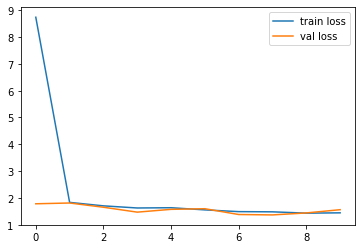

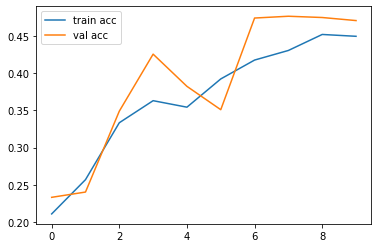

In [12]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import classification_report
predIdxs = model.predict(train_generator)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(train_generator.labels, predIdxs,
                            target_names=["angry", "disgust","fear","happy","neutral","sad","surprise"]))

              precision    recall  f1-score   support

       angry       0.47      0.25      0.33      3992
     disgust       0.00      0.00      0.00       436
        fear       0.31      0.00      0.01      4103
       happy       0.50      0.92      0.65      7164
     neutral       0.48      0.37      0.42      4982
         sad       0.41      0.42      0.42      4938
    surprise       0.57      0.81      0.67      3205

    accuracy                           0.49     28820
   macro avg       0.39      0.40      0.36     28820
weighted avg       0.45      0.49      0.43     28820



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Transfer Learning using VGG for grayscale mode

In [30]:
img_size = 224
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)
#ImageDataGenerator accepts the original data, randomly transforms it, and returns only the new, transformed data
#Translations, Rotations, Changes in scale, Shearing, Horizontal (and in some cases, vertical) flips

train_generator = datagen_train.flow_from_directory("data/train/",
                                                    target_size=(img_size,img_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("data/test/",
                                                    target_size=(img_size,img_size),                                                  
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [31]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

IMAGE_SIZE = [224, 224]
# add preprocessing layer to the fromt of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #pooling='max')

In [32]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [33]:
# added layers 
x = Flatten()(vgg.output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.15)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.15)(x)
prediction = Dense(7, activation='softmax')(x)

In [34]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [35]:
#Compiling the model adding loss function and optimizer and evaluation metrics
model.compile( loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [39]:
history = model.fit(train_generator,
        validation_data = validation_generator,
        epochs = 10,
        steps_per_epoch = len(train_generator),
        validation_steps = len(validation_generator)#,
        #callbacks = [learning_rate_reduction]
)

Epoch 1/10
451/451 [==============================] - 190s 421ms/step - loss: 1.5031 - accuracy: 0.3993 - val_loss: 1.4751 - val_accuracy: 0.4222
Epoch 2/10
451/451 [==============================] - 190s 421ms/step - loss: 1.5811 - accuracy: 0.3689 - val_loss: 1.4930 - val_accuracy: 0.4193
Epoch 3/10
451/451 [==============================] - 190s 422ms/step - loss: 1.5639 - accuracy: 0.3622 - val_loss: 1.4847 - val_accuracy: 0.4199
Epoch 4/10
451/451 [==============================] - 190s 421ms/step - loss: 1.4672 - accuracy: 0.4166 - val_loss: 1.4730 - val_accuracy: 0.4230
Epoch 5/10
451/451 [==============================] - 190s 421ms/step - loss: 1.4505 - accuracy: 0.4213 - val_loss: 1.5628 - val_accuracy: 0.3915
Epoch 6/10
451/451 [==============================] - 190s 421ms/step - loss: 1.4353 - accuracy: 0.4206 - val_loss: 1.6862 - val_accuracy: 0.4097
Epoch 7/10
451/451 [==============================] - 190s 421ms/step - loss: 1.4134 - accuracy: 0.4336 - val_loss: 1.4619 -

In [38]:
from sklearn.metrics import classification_report
predIdxs = model.predict(train_generator)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(train_generator.labels, predIdxs,
                            target_names=["angry", "disgust","fear","happy","neutral","sad","surprise"]))

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00      3992
     disgust       0.00      0.00      0.00       436
        fear       0.34      0.07      0.12      4103
       happy       0.85      0.73      0.79      7164
     neutral       0.09      0.01      0.01      4982
         sad       0.24      0.94      0.39      4938
    surprise       0.77      0.57      0.65      3205

    accuracy                           0.42     28820
   macro avg       0.33      0.33      0.28     28820
weighted avg       0.40      0.42      0.35     28820



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looking at the number of images in the dataset, It is evident that there are not equal samples of data for all the classes. As a result model might get trained to predict class with highest samples.
This imbalance in the data for the classes can be controlled resampling of data either by oversampling or undersampling, so model can be trained on almost same number of samples across classes and predict accordingly.

It is quite evident from the results that accuracy of the model is high when used with pretrained model(VGG16) followed by a CNN model without droupouts and batch normalization and lastly the normal CNN model with dropouts.

Things that may be helpful in increasing accuracy:

1)Resampling the dataset or using a balanced dataset with almost equal number of samples across samples.

2)Tuning the hyperparameters might have a great impact on model's accuracy.

3)Tuning the model by increasing or decreasing the dropouts layers, hideen layers will also helps in increasing the accuracy. 